# Linear Regression 线性回归
我的 python 版本为 3.9


In [1]:
import pandas as pd 
import seaborn as sns 
sns.set(context="notebook", style="whitegrid", palette="dark") # 数据可视化的一些设置
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population','profit']) # 读取数据并赋予类名，返回 dataFrame 表格类型
df.head() # 看前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info() # 返回 dataFrame 的一些信息
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 97 entries, 0 to 96 --->行数，96行
# Data columns (total 2 columns): --->列数，2列
#  #   Column      Non-Null Count  Dtype  
# ---  ------      --------------  -----  
#  0   population  97 non-null     float64 --->数据类型为float 64
#  1   profit      97 non-null     float64
# dtypes: float64(2)
# memory usage: 1.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


***
# 绘图

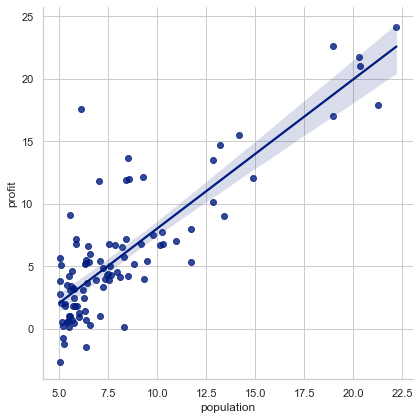

In [4]:
# parameters:
    # x,y: Input variables
    # data: 数据集
    # height: 绘制的图表尺寸
    # fit_reg: 为 True 则绘制 linear regression 模型，为 False 则不绘制
    # seabarn 为 matplotlib 的扩展
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=True)
plt.show()

In [13]:
def get_X(df): # 读取特征,即 x0 ... xn 的矩阵
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # one 是 m x 1 的 dataframe
    data = pd.concat([ones,df],axis=1)
    # data:
    # ones	population	profit
    # 0	1.0	6.1101	17.5920
    # 1	1.0	5.5277	9.1302
    # 2	1.0	8.5186	13.6620
    # 3	1.0	7.0032	11.8540
    # 4	1.0	5.8598	6.8233
    # return data.iloc[:, :-1] # 返回只有 ones 和第一列
    return data.iloc[:, : -1].values # .values 将 dataFrame 转化为多维数组
    
def get_y(df): # 读取y值
    return np.array(df.iloc[:,-1]) # 取 df 的最后一列
    
    
def normalize_feature(df):
    # apply(func): 将 func 这个函数应用于 dataFrame
    # mean(): 求平均值
    # std(): 求标准差 
    return df.apply(lambda column: (column - column.mean()) / column.std()) # 特征缩放

多变量的假设 h 表示为：$${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为 $${{h}_{\theta }}\left( x \right)={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$$，其中上标T代表矩阵转置。

In [ ]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.optimizers.SGD): # 国外大神写的
    # 所以placeholder()函数是在神经网络构建graph的时候在模型中的占位，此时并没有把要输入的数据传入模型
    # 它只会分配必要的内存。等建立session，在会话中，运行模型的时候通过feed_dict()函数向占位符喂入数据。
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)
    
    # construct the graph
    with tf.variable_creator_scope('linear-regression'):
        W = tf.get_variable("weight",
                            (X_data.shape[1],1),
                            initializer=tf.constant_initializer()) # n * 1
        
         y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

In [11]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit']) # 读取数据，并赋予列名

data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [14]:
# 查看一下数据维度
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [16]:
theta = np.zeros(X.shape[1]) # X.shape[1] = n , 代表有 n 个特征值
print(theta)

[0. 0.]


In [19]:
def lr_cost(theta, X, y):
#     """
#     X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0]  # 样本数

    inner = X @ theta - y 
    
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    return cost
    
lr_cost(theta,X,y) # 返回 J theta（代价函数）的值


32.072733877455676

### 解释
inner = X @ theta - y    这一样代码表示 $$ {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}$$ 的矩阵形式


square_sum = inner.T @ inner 表示  $$\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

所以最后 cost = $$ J\left( \theta  \right)$$

*********
# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$